# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the median for each of the 4 size columns
*  calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
#Read the data and name the columns
iris_data = pd.read_csv(url, names=names)

#Take a look at the column info (how many columns, what type of data, any missing data?) 
print(iris_data.info())
#Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included  
print(iris_data.head(10))
print(iris_data.tail(10))

#Find out how many unique values there are in the species column
print("There are ", len(iris_data['species'].unique()),"unique species")
print(iris_data['species'].unique())

#Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe())
print(iris_data["species"].value_counts())
#check for null values
print(iris_data.isnull().values.any())  
#check the max/min/std for each specie
print(iris_data.groupby("species").describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30)
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.800000,3.077143,3.660952,1.161905
std,0.854063,0.443599,1.805414,0.768287
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def clean(df):
#Drop any null values from each column
  new_df=df.dropna()
  return new_df
test_clean=clean(test)
train_clean=clean(train)
#print(train.info())
#print(train_clean.info()) those two are the same so there is no need for dropna

# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
# def calc_mean(df,col):
def calc_mean(df):
  try:
    mean=df.mean(axis=0)
    return mean
  except:
    return "This is not a number"

mean=calc_mean(train_clean)
print(mean)

def encode(df,**kwds):
  #define the keywords
  median=kwds["mean"]
  key=kwds["column"]
  if df[key] >= median:
    return 1
  else:
    return 0

#How can I loop over the keys -1????
#How can I labe the new columns in the for loop train_clean['encoded_sepal-length']????
#How can I link
#for i in train_clean.keys():
#  train_clean[i]=train_clean.apply(encode, axis=1, column=i, mean=mean())
#  mean[i]=calc_mean(train_clean,i) #need to find a way to insert "i" in the variable name????
#  print(mean)
#  train_clean[i]=train_clean.apply(encode,axis=1,column=i,median=mean[i])

#need to convert it to a list
col_names=list(train_clean.keys())
col_names.remove("species")
print(col_names)
#col_names[0]=sepal-length
for i in col_names:
  train_clean['encoded_'+i] = train_clean.apply(encode, axis=1, column=i, mean=train[i].median())


#train_clean['encoded_sepal-length'] = train_clean.apply(encode, axis=1, column='sepal-length', mean=train['sepal-length'].median()) 
#train_clean['encoded_sepal-width'] = train_clean.apply(encode, axis=1, column='sepal-width', mean=train['sepal-width'].median())
#train_clean['encoded_petal-length'] = train_clean.apply(encode, axis=1, column='petal-length', mean=train['petal-length'].median())
#train_clean['encoded_petal-width'] = train_clean.apply(encode, axis=1, column='petal-width', mean=train['petal-width'].median())

print(train_clean.head(10))
new_train=train_clean.drop(['sepal-length', 'sepal-width','petal-length','petal-width'], axis = 1)
print(new_train.head(10))

sepal-length    5.800000
sepal-width     3.077143
petal-length    3.660952
petal-width     1.161905
dtype: float64
['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
     sepal-length  sepal-width  petal-length  petal-width          species  \
149           5.9          3.0           5.1          1.8   Iris-virginica   
39            5.1          3.4           1.5          0.2      Iris-setosa   
124           6.7          3.3           5.7          2.1   Iris-virginica   
34            4.9          3.1           1.5          0.1      Iris-setosa   
97            6.2          2.9           4.3          1.3  Iris-versicolor   
93            5.0          2.3           3.3          1.0  Iris-versicolor   
8             4.4          2.9           1.4          0.2      Iris-setosa   
94            5.6          2.7           4.2          1.3  Iris-versicolor   
21            5.1          3.7           1.5          0.4      Iris-setosa   
33            5.5          4.2           1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def prop_above_mean(df,specie,col):
  prop_spec_above = df[(df[col]== 1) & (df['species']==specie)][col].count()/df[(df[col]== 1)][col].count()*100
  return prop_spec_above


prop_ab_Iris_virginica_SL=prop_above_mean(new_train,"Iris-virginica","encoded_sepal-length")
#Check that they sum to 100
# prop_Iris_versicolor_SL=prop_above_mean(new_train,"Iris-versicolor","encoded_sepal-length")
# prop_Iris_setosa_SL=prop_above_mean(new_train,"Iris-setosa","encoded_sepal-length")
# print(prop_Iris_virginica_SL,prop_Iris_versicolor_SL,prop_Iris_setosa_SL)
prop_ab_Iris_virginica_SW=prop_above_mean(new_train,"Iris-virginica","encoded_sepal-width")
prop_ab_Iris_virginica_PL=prop_above_mean(new_train,"Iris-virginica","encoded_petal-length")
prop_ab_Iris_virginica_PW=prop_above_mean(new_train,"Iris-virginica","encoded_petal-width")
print(prop_ab_Iris_virginica_SL,prop_ab_Iris_virginica_SW,prop_ab_Iris_virginica_PL,prop_ab_Iris_virginica_PW)

#Calculate the prop are NOT Iris_virginica
prop_ab_NO_Iris_virginica_SL= 100-prop_ab_Iris_virginica_SL
prop_ab_NO_Iris_virginica_SW= 100-prop_ab_Iris_virginica_SW
prop_ab_NO_Iris_virginica_PL= 100-prop_ab_Iris_virginica_PL
prop_ab_NO_Iris_virginica_PW= 100-prop_ab_Iris_virginica_PW

print(prop_ab_NO_Iris_virginica_SL,prop_ab_NO_Iris_virginica_SW,prop_ab_NO_Iris_virginica_PL,prop_ab_NO_Iris_virginica_PW)
# Iris-virginica                       
# Iris-versicolor                
# Iris-setosa

62.264150943396224 33.33333333333333 64.15094339622641 59.64912280701754
37.735849056603776 66.66666666666667 35.84905660377359 40.35087719298246


### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica
def prop_below_mean(df,specie,col):
  prop_spec_below = df[(df[col]== 0) & (df['species']==specie)][col].count()/df[(df[col]== 0)][col].count()*100
  return prop_spec_below

prop_b_Iris_virginica_SL=prop_below_mean(new_train,"Iris-virginica","encoded_sepal-length")
prop_b_Iris_virginica_SW=prop_below_mean(new_train,"Iris-virginica","encoded_sepal-width")
prop_b_Iris_virginica_PL=prop_below_mean(new_train,"Iris-virginica","encoded_petal-length")
prop_b_Iris_virginica_PW=prop_below_mean(new_train,"Iris-virginica","encoded_petal-width")
print(prop_b_Iris_virginica_SL,prop_b_Iris_virginica_SW,prop_b_Iris_virginica_PL,prop_b_Iris_virginica_PW)


1.9230769230769231 30.555555555555557 0.0 0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
#Analyse Iris-versicolor specie
# calculate the proportion of results where the value is on or above mean that are of the species Iris-versicolor
prop_ab_Iris_versicolor_SL=prop_above_mean(new_train,"Iris-versicolor","encoded_sepal-length")
prop_ab_Iris_versicolor_SW=prop_above_mean(new_train,"Iris-versicolor","encoded_sepal-width")
prop_ab_Iris_versicolor_PL=prop_above_mean(new_train,"Iris-versicolor","encoded_petal-length")
prop_ab_Iris_versicolor_PW=prop_above_mean(new_train,"Iris-versicolor","encoded_petal-width")
print(prop_ab_Iris_versicolor_SL,prop_ab_Iris_versicolor_SW,prop_ab_Iris_versicolor_PL,prop_ab_Iris_versicolor_PW)
#Calculate the prop are NOT Iris_versicolor 
prop_ab_NO_Iris_versicolor_SL= 100-prop_ab_Iris_versicolor_SL
prop_ab_NO_Iris_versicolor_SW= 100-prop_ab_Iris_versicolor_SW
prop_ab_NO_Iris_versicolor_PL= 100-prop_ab_Iris_versicolor_PL
prop_ab_NO_Iris_versicolor_PW= 100-prop_ab_Iris_versicolor_PW
print(prop_ab_NO_Iris_versicolor_SL,prop_ab_NO_Iris_versicolor_SW,prop_ab_NO_Iris_versicolor_PL,prop_ab_NO_Iris_versicolor_PW)
# calculate the proportion of results where the value is below median that are of the species Iris-versicolor
prop_b_Iris_versicolor_SL=prop_below_mean(new_train,"Iris-versicolor","encoded_sepal-length")
prop_b_Iris_versicolor_SW=prop_below_mean(new_train,"Iris-versicolor","encoded_sepal-width")
prop_b_Iris_versicolor_PL=prop_below_mean(new_train,"Iris-versicolor","encoded_petal-length")
prop_b_Iris_versicolor_PW=prop_below_mean(new_train,"Iris-versicolor","encoded_petal-width")
print(prop_b_Iris_versicolor_SL,prop_b_Iris_versicolor_SW,prop_b_Iris_versicolor_PL,prop_b_Iris_versicolor_PW)

#Analyse Iris-setosa  specie
# calculate the proportion of results where the value is on or above mean that are of the species Iris-setosa
prop_ab_Iris_setosa_SL=prop_above_mean(new_train,"Iris-setosa","encoded_sepal-length")
prop_ab_Iris_setosa_SW=prop_above_mean(new_train,"Iris-setosa","encoded_sepal-width")
prop_ab_Iris_setosa_PL=prop_above_mean(new_train,"Iris-setosa","encoded_petal-length")
prop_ab_Iris_setosa_PW=prop_above_mean(new_train,"Iris-setosa","encoded_petal-width")
print(prop_ab_Iris_setosa_SL,prop_ab_Iris_setosa_SW,prop_ab_Iris_setosa_PL,prop_ab_Iris_setosa_PW)
#Calculate the prop are NOT Iris_setosa 
prop_ab_NO_Iris_setosa_SL= 100-prop_ab_Iris_setosa_SL
prop_ab_NO_Iris_setosa_SW= 100-prop_ab_Iris_setosa_SW
prop_ab_NO_Iris_setosa_PL= 100-prop_ab_Iris_setosa_PL
prop_ab_NO_Iris_setosa_PW= 100-prop_ab_Iris_setosa_PW
print(prop_ab_NO_Iris_setosa_SL,prop_ab_NO_Iris_setosa_SW,prop_ab_NO_Iris_setosa_PL,prop_ab_NO_Iris_setosa_PW)
# calculate the proportion of results where the value is below median that are of the species Iris-setosa
prop_b_Iris_setosa_SL=prop_below_mean(new_train,"Iris-setosa","encoded_sepal-length")
prop_b_Iris_setosa_SW=prop_below_mean(new_train,"Iris-setosa","encoded_sepal-width")
prop_b_Iris_setosa_PL=prop_below_mean(new_train,"Iris-setosa","encoded_petal-length")
prop_b_Iris_setosa_PW=prop_below_mean(new_train,"Iris-setosa","encoded_petal-width")
print(prop_b_Iris_setosa_SL,prop_b_Iris_setosa_SW,prop_b_Iris_setosa_PL,prop_b_Iris_setosa_PW)

35.84905660377358 14.492753623188406 35.84905660377358 40.35087719298245
64.15094339622641 85.5072463768116 64.15094339622641 59.64912280701755
26.923076923076923 63.888888888888886 26.923076923076923 20.833333333333336
1.8867924528301887 52.17391304347826 0.0 0.0
98.11320754716981 47.82608695652174 100.0 100.0
71.15384615384616 5.555555555555555 73.07692307692307 79.16666666666666


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
#Method 1 unsuccessfull: Create a list of dictionaries Then use a loop to go through the list and print
#Install tabulate
# import sys, os
# import warnings
# import googleapiclient

# warnings.filterwarnings('ignore')
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# If you are running this notebook in Colab, follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

# def install_dlvm_packages():
#!pip install tabulate
#from tabulate import tabulate
# if 'google.colab' in sys.modules:
#   from google.colab import auth as google_auth
#   google_auth.authenticate_user()
#   !pip install witwidget --quiet
#   !pip install tensorflow==1.15.0 --quiet
#   !gcloud config set project $PROJECT_ID

# elif "DL_PATH" in os.environ:
#   install_dlvm_packages()



#Create a list of dictionaries 
dict_sepal_length = {
  "species": iris_data["species"].unique(),
  "above_mean": [prop_ab_Iris_setosa_SL, prop_ab_Iris_versicolor_SL, prop_ab_Iris_virginica_SL],
  "below_mean": [prop_b_Iris_setosa_SL, prop_b_Iris_versicolor_SL, prop_b_Iris_virginica_SL]
}

dict_sepal_width = {
  "species": iris_data["species"].unique(),
  "above_mean": [prop_ab_Iris_setosa_SW, prop_ab_Iris_versicolor_SW, prop_ab_Iris_virginica_SW],
  "below_mean": [prop_b_Iris_setosa_SW, prop_b_Iris_versicolor_SW, prop_b_Iris_virginica_SW]
}

dict_petal_length = {
  "species": iris_data["species"].unique(),
  "above_mean": [prop_ab_Iris_setosa_PL, prop_ab_Iris_versicolor_PL, prop_ab_Iris_virginica_PL],
  "below_mean": [prop_b_Iris_setosa_PL, prop_b_Iris_versicolor_PL, prop_b_Iris_virginica_PL]
}

dict_petal_width = {
  "species": iris_data["species"].unique(),
  "above_mean": [prop_ab_Iris_setosa_PW, prop_ab_Iris_versicolor_PW, prop_ab_Iris_virginica_PW],
  "below_mean": [prop_b_Iris_setosa_PW, prop_b_Iris_versicolor_PW, prop_b_Iris_virginica_PW]
}


list_dict=[dict_sepal_length,dict_sepal_width,dict_petal_length,dict_petal_width]
header = list_dict[0].keys()
rows =  [x.values() for x in list_dict]
#print(tabulate.tabulate(rows, header)) ????why this does not work???
# creating a dataframe from dictionary
#df_iris = pd.DataFrame(list_dict)
#print(df_iris)

#for i in df_iris:
#  print(i)
#print(list_dict[0]["species"])
# show which columns are reliable predictors

#Method 2:
#Create lists and then a df
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-viriginica']
above_mean_SL = [prop_ab_Iris_setosa_SL, prop_ab_Iris_versicolor_SL, prop_ab_Iris_virginica_SL]
above_mean_SW = [prop_ab_Iris_setosa_SW, prop_ab_Iris_versicolor_SW, prop_ab_Iris_virginica_SW]
above_mean_PL = [prop_ab_Iris_setosa_PL, prop_ab_Iris_versicolor_PL, prop_ab_Iris_virginica_PL]
above_mean_PW = [prop_ab_Iris_setosa_PW, prop_ab_Iris_versicolor_PW, prop_ab_Iris_virginica_PW]
below_mean_SL = [prop_b_Iris_setosa_SL, prop_b_Iris_versicolor_SL, prop_b_Iris_virginica_SL]
below_mean_SW = [prop_b_Iris_setosa_SW, prop_b_Iris_versicolor_SW, prop_b_Iris_virginica_SW]
below_mean_PL = [prop_b_Iris_setosa_PL, prop_b_Iris_versicolor_PL, prop_b_Iris_virginica_PL]
below_mean_PW = [prop_b_Iris_setosa_PW, prop_b_Iris_versicolor_PW, prop_b_Iris_virginica_PW]

df_iris = pd.DataFrame(list(zip(species_list, above_mean_SL, above_mean_SW, above_mean_PL, above_mean_PW, below_mean_SL, below_mean_SW, below_mean_PL, below_mean_PW)), columns =['species', 'sepal_length_above_mean','sepal_width_above_mean','petal_length_above_mean','petal_width_above_mean','sepal_length_below_mean','sepal_width_below_mean','petal_length_below_mean','petal_width_below_mean'])
df_iris
#Print just one row
#print(df_iris.loc[2])
#Then use a loop to go through the list and print any species and indicator (above or below mean) that can reliably be predicted. A reliable prediction may be one over 0.5
#????
#for i in df_iris.keys():
#  print(df_iris[(df_iris[i].values() >= 50.0).all(axis=1)])

#sort the proportions to check what are the largest


,species,sepal_length_above_mean,sepal_width_above_mean,petal_length_above_mean,petal_width_above_mean,sepal_length_below_mean,sepal_width_below_mean,petal_length_below_mean,petal_width_below_mean
0,Iris-setosa,1.886792,52.173913,0.000000,0.000000,71.153846,5.555556,73.076923,79.166667
1,Iris-versicolor,35.849057,14.492754,35.849057,40.350877,26.923077,63.888889,26.923077,20.833333
2,Iris-viriginica,62.264151,33.333333,64.150943,59.649123,1.923077,30.555556,0.000000,0.000000



### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
            if df['sepal-length'] == 0:
                return None
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.35555555555555557


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


What do you notice? (write your answer here)

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


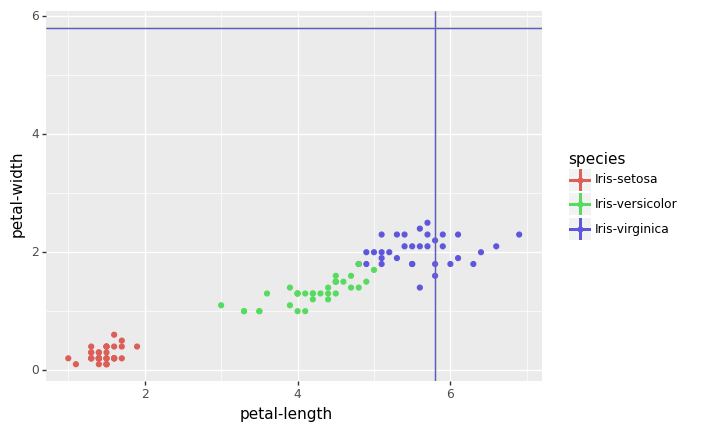

<ggplot: (8726952220085)>

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))